In [116]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [117]:
# Create a Model Class that inherits nn.Module

In [118]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=8, out_features=3):  #definition of network, 2 layers; first layer has 8 neurons and second has 9
        super().__init__() #always do in OOP
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x)) #rectified linear unit function (ReLU)
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [119]:
torch.manual_seed(41) #picking a random seed
model = Model()

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
my_df=pd.read_csv("iris.csv")
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [122]:
#changing last column from string to num
my_df['species'] = my_df['species'].replace("setosa", 0)
my_df['species'] = my_df['species'].replace("versicolor", 1)
my_df['species'] = my_df['species'].replace("virginica", 2)

C:\Users\carls\AppData\Local\Temp\ipykernel_27232\1120986331.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace("virginica", 2)


In [123]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [124]:
#train/test split
X = my_df.drop('species', axis=1)
y = my_df['species']

X = X.values
y = y.values

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41)

In [127]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [128]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [129]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [130]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train) 
    loss = criterion(y_pred, y_train) #predicted value vs actual value
    losses.append(loss.detach().numpy())

    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.1318050622940063
Epoch: 10 and loss: 0.9658581614494324
Epoch: 20 and loss: 0.67915278673172
Epoch: 30 and loss: 0.40087205171585083
Epoch: 40 and loss: 0.22570067644119263
Epoch: 50 and loss: 0.12255845218896866
Epoch: 60 and loss: 0.07509137690067291
Epoch: 70 and loss: 0.05467578023672104
Epoch: 80 and loss: 0.04448389261960983
Epoch: 90 and loss: 0.03846167400479317


Text(0.5, 0, 'Epoch')

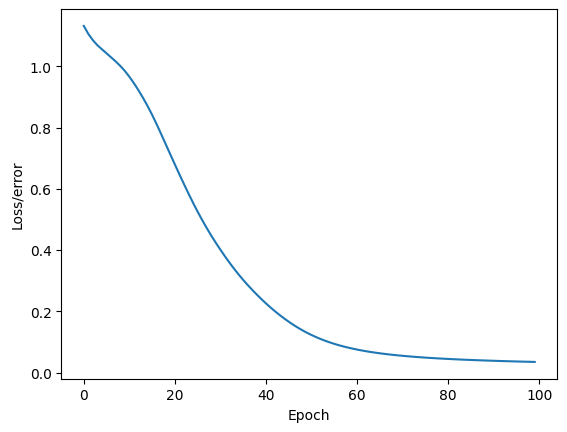

In [131]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss/error")
plt.xlabel("Epoch")

In [132]:
with torch.no_grad(): #turns off backprop
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test) #find loss vs actual

In [133]:
loss

tensor(0.1458)

In [140]:
correct = 0
with torch.no_grad():
    for i, data in enumerate (X_test):
        y_val = model.forward(data)
        
        #number in 2nd column from right tells us which flower the model thinks it is (0, 1, 2 are defined above)
        #rightmost column tells us actual value
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')


        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'Correct: {correct}') # 30 points in total)

1.) tensor([-7.7132,  1.5807,  4.8588]) 	 2 	 2
2.) tensor([-10.2249,   0.5155,   8.7638]) 	 2 	 2
3.) tensor([-10.7185,   1.1882,   8.2269]) 	 2 	 2
4.) tensor([-4.4690,  3.5339, -1.1210]) 	 1 	 1
5.) tensor([-9.0873,  1.4669,  6.2793]) 	 2 	 2
6.) tensor([-2.2770,  3.7022, -4.1140]) 	 1 	 1
7.) tensor([-7.0673,  2.2028,  3.2917]) 	 2 	 2
8.) tensor([-4.2226,  3.6468, -1.5420]) 	 1 	 1
9.) tensor([-8.0634,  1.8251,  4.7820]) 	 2 	 2
10.) tensor([-10.8515,   0.5058,   9.3629]) 	 2 	 2
11.) tensor([-6.8611,  2.2126,  3.0811]) 	 2 	 2
12.) tensor([  9.4301,   3.2669, -18.8494]) 	 0 	 0
13.) tensor([  8.5966,   2.9338, -17.1305]) 	 0 	 0
14.) tensor([-1.0571,  3.1664, -4.7063]) 	 1 	 1
15.) tensor([  8.0257,   3.2469, -16.7651]) 	 0 	 0
16.) tensor([-6.7032,  2.4148,  2.6586]) 	 2 	 2
17.) tensor([  8.4607,   3.0915, -17.1118]) 	 0 	 0
18.) tensor([-7.5983,  1.7014,  4.5610]) 	 1 	 2
19.) tensor([  9.0443,   3.1470, -18.0944]) 	 0 	 0
20.) tensor([  7.7209,   2.9005, -15.7171]) 	 0 	 0
21

In [142]:
torch.save(model.state_dict(), 'BasicNetworkPractice.pt')